# Correlation Script

Input variables: 63

In [1]:
# Importing required packages

import pandas as pd
import pandas_profiling
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Choose the city of analysis

city = 'Recife'
# city = 'CG'
# city = 'Curitiba'

In [3]:
# Put the integrated data path

file_name = "new_feats_data.csv"
new_feats_data_path = os.getcwd() + "/../data/output/" + city + "/" + file_name

In [4]:
# Importing the data after Feature Engineering

df = pd.read_csv(new_feats_data_path, index_col=None, header=0)

df.head()

,route,tripNum,shapeId,routeFrequency,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,...,MONTH(gps_datetime),MONTH(precipitationTime),MONTH(alertDateTime),MONTH(jamUpdateDateTime),MONTH(jamExpirationDateTime),WEEKDAY(gps_datetime),WEEKDAY(precipitationTime),WEEKDAY(alertDateTime),WEEKDAY(jamUpdateDateTime),WEEKDAY(jamExpirationDateTime)
0,96,1,Route_219,low_frequency,22857,-8.046589,-34.878125,3606.0,50661,NaN,...,12,12,12.0,NaN,NaN,2,2,2.0,NaN,NaN
1,96,1,Route_219,low_frequency,22857,-8.046589,-34.878125,3606.0,50671,409090.0,...,12,12,12.0,NaN,NaN,2,2,2.0,NaN,NaN
2,96,1,Route_219,low_frequency,22857,-8.046589,-34.878125,3606.0,50669,406112.0,...,12,12,12.0,NaN,NaN,2,2,2.0,NaN,NaN
3,96,1,Route_219,low_frequency,22857,-8.046589,-34.878125,3606.0,50662,NaN,...,12,12,12.0,NaN,NaN,2,2,2.0,NaN,NaN
4,96,1,Route_219,low_frequency,22857,-8.046589,-34.878125,3606.0,50663,NaN,...,12,12,12.0,NaN,NaN,2,2,2.0,NaN,NaN


In [7]:
df.dtypes

route                                 int64
tripNum                               int64
shapeId                              object
routeFrequency                       object
shapeSequence                         int64
shapeLat                            float64
shapeLon                            float64
distanceTraveledShape               float64
busCode                               int64
gpsPointId                          float64
gpsLat                              float64
gpsLon                              float64
distanceToShapePoint                float64
stopPointId                           int64
problem                              object
precipitation                       float64
alertSubtype                         object
alertType                            object
alertRoadType                       float64
alertConfidence                     float64
alertNComments                      float64
alertNImages                        float64
alertNThumbsUp                  

In [8]:
# Descriptive statistics
pandas_profiling.ProfileReport(df, check_correlation=True, correlation_threshold=0.5)

Number of variables,57
Number of observations,1123095
Total Missing (%),17.2%
Total size in memory,465.9 MiB
Average record size in memory,435.0 B
Numeric,22
Categorical,6
Boolean,5
Date,0
Text (Unique),0
Rejected,24


## 1. Checking Correlation

In [5]:
def plot_corr(df_corr):
    fig, ax = plt.subplots(figsize=(14,14))
    
    # Drop self-correlations
    dropSelf = np.zeros_like(df_corr)
    dropSelf[np.triu_indices_from(dropSelf)] = True
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Generate Color Map
    sns.heatmap(df_corr, xticklabels=df_corr.columns.values, yticklabels=df_corr.columns.values, 
                cmap=colormap, mask=dropSelf, linewidths=.4 )

In [6]:
def showCorrelatedPositiveVar(df_corr, min_corr_positive_value):
    indices = np.where(df_corr >= min_corr_positive_value)
    indices = [(df_corr.index[x], df_corr.columns[y]) for x, y in zip(*indices)
                                        if x != y]
    
    return indices


def showCorrelatedNegativeVar(df_corr, min_corr_negative_value):
    indices = np.where(df_corr <= min_corr_negative_value)
    indices = [(df_corr.index[x], df_corr.columns[y]) for x, y in zip(*indices)
                                        if x != y]
        
    return indices

### 1.1. Pearson

The Pearson correlation coefficient is a widely used approach that measures the **linear dependence** between two variables. The correlation coefficient ranges from -1 to 1. 
* 1: total positive correlation
* -1: total negative correlation
* 0: no correlation or non-linear correlation


In [7]:
pearson_corr = df.corr()
pearson_corr

,route,tripNum,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,gpsLat,gpsLon,...,MONTH(gps_datetime),MONTH(precipitationTime),MONTH(alertDateTime),MONTH(jamUpdateDateTime),MONTH(jamExpirationDateTime),WEEKDAY(gps_datetime),WEEKDAY(precipitationTime),WEEKDAY(alertDateTime),WEEKDAY(jamUpdateDateTime),WEEKDAY(jamExpirationDateTime)
route,1.000000,0.105715,0.830694,0.242688,0.320941,-0.070252,0.407466,0.369609,0.249019,0.298176,...,NaN,NaN,-0.009999,NaN,-0.159229,-0.017284,-0.017284,0.009299,-0.003595,0.142071
tripNum,0.105715,1.000000,0.095402,0.151573,-0.050439,-0.142230,0.076373,0.164213,0.168889,-0.022708,...,NaN,NaN,0.002365,NaN,0.224719,0.012385,0.012385,0.048301,0.051428,0.341388
shapeSequence,0.830694,0.095402,1.000000,0.319023,0.249152,-0.008870,0.359257,0.345773,0.329287,0.250487,...,NaN,NaN,-0.010511,NaN,-0.190778,-0.002058,-0.002058,0.020677,0.008808,0.076819
shapeLat,0.242688,0.151573,0.319023,1.000000,0.269546,-0.033839,0.531007,0.491191,0.999969,0.257568,...,NaN,NaN,0.008368,NaN,0.295230,-0.007626,-0.007626,0.008389,0.042405,-0.081676
shapeLon,0.320941,-0.050439,0.249152,0.269546,1.000000,0.127533,0.742917,0.564843,0.257592,0.999960,...,NaN,NaN,-0.035580,NaN,0.649478,-0.041581,-0.041581,0.020854,-0.003179,-0.270462
distanceTraveledShape,-0.070252,-0.142230,-0.008870,-0.033839,0.127533,1.000000,0.022494,-0.030245,-0.062755,0.102408,...,NaN,NaN,-0.019058,NaN,-0.632508,0.002787,0.002787,0.001964,-0.003182,0.070271
busCode,0.407466,0.076373,0.359257,0.531007,0.742917,0.022494,1.000000,0.829912,0.553690,0.699532,...,NaN,NaN,-0.055981,NaN,0.647210,-0.019576,-0.019576,0.029729,0.024445,-0.207079
gpsPointId,0.369609,0.164213,0.345773,0.491191,0.564843,-0.030245,0.829912,1.000000,0.491259,0.564739,...,NaN,NaN,-0.040721,NaN,0.492503,-0.224176,-0.224176,-0.193027,-0.218952,-0.192696
gpsLat,0.249019,0.168889,0.329287,0.999969,0.257592,-0.062755,0.553690,0.491259,1.000000,0.257536,...,NaN,NaN,0.007327,NaN,0.223787,0.007688,0.007688,0.019761,0.049445,-0.050876
gpsLon,0.298176,-0.022708,0.250487,0.257568,0.999960,0.102408,0.699532,0.564739,0.257536,1.000000,...,NaN,NaN,-0.032584,NaN,0.585357,-0.038618,-0.038618,0.012202,-0.005783,-0.251149


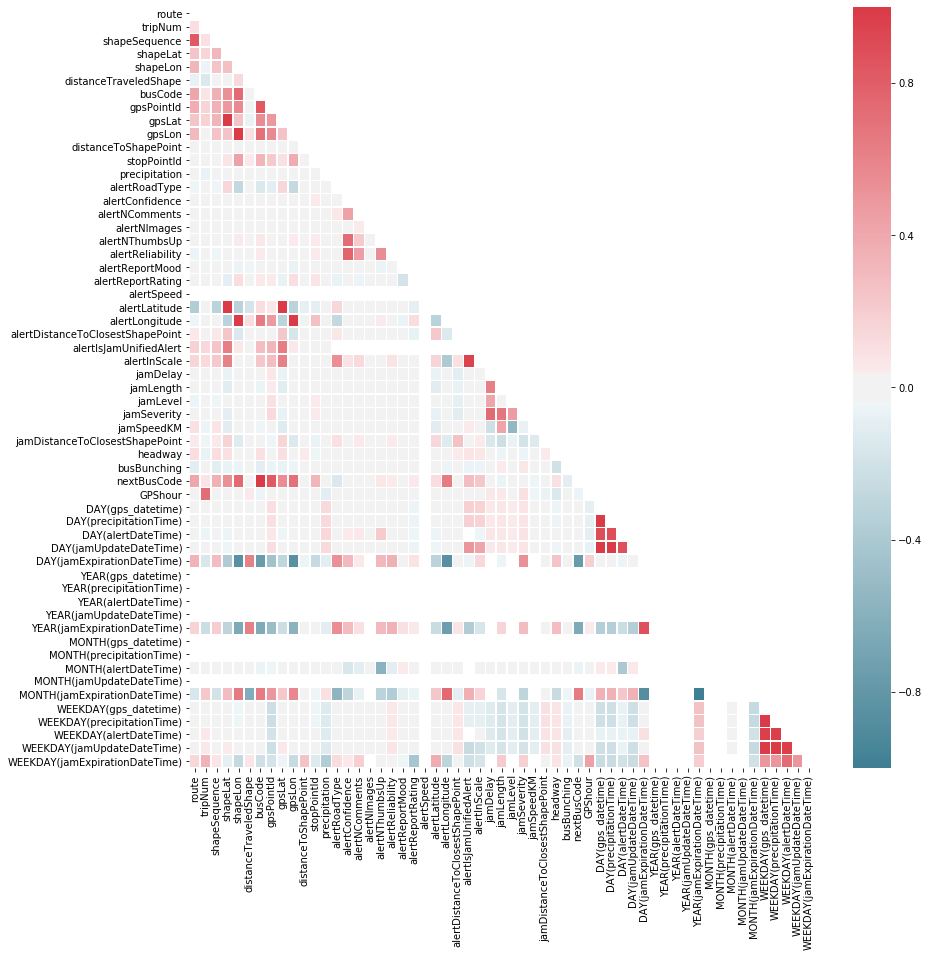

In [8]:
plot_corr(pearson_corr)

In [41]:
showCorrelatedPositiveVar(pearson_corr, 0.0)

# showCorrelatedNegativeVar(pearson_corr, -0.2)

[('route', 'tripNum'),
 ('route', 'shapeSequence'),
 ('route', 'shapeLat'),
 ('route', 'shapeLon'),
 ('route', 'busCode'),
 ('route', 'gpsPointId'),
 ('route', 'gpsLat'),
 ('route', 'gpsLon'),
 ('route', 'stopPointId'),
 ('route', 'alertNImages'),
 ('route', 'alertReportMood'),
 ('route', 'alertDistanceToClosestShapePoint'),
 ('route', 'alertIsJamUnifiedAlert'),
 ('route', 'alertInScale'),
 ('route', 'jamLength'),
 ('route', 'jamSpeedKM'),
 ('route', 'jamDistanceToClosestShapePoint'),
 ('route', 'headway'),
 ('route', 'nextBusCode'),
 ('route', 'DAY(gps_datetime)'),
 ('route', 'DAY(alertDateTime)'),
 ('route', 'DAY(jamUpdateDateTime)'),
 ('route', 'DAY(jamExpirationDateTime)'),
 ('route', 'YEAR(jamExpirationDateTime)'),
 ('route', 'WEEKDAY(jamExpirationDateTime)'),
 ('tripNum', 'route'),
 ('tripNum', 'shapeSequence'),
 ('tripNum', 'shapeLat'),
 ('tripNum', 'busCode'),
 ('tripNum', 'gpsPointId'),
 ('tripNum', 'gpsLat'),
 ('tripNum', 'alertConfidence'),
 ('tripNum', 'alertNComments'),
 (

## Spearman

The Spearman correlation coefficient is a approach that measures the dependence (linear or non-linear) between two variables. The correlation coefficient ranges from -1 to 1. 
* 1: total positive correlation
* -1: total negative correlation
* 0: no correlation


In [9]:
spearman_corr = df.corr(method="spearman")
spearman_corr

,route,tripNum,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,gpsLat,gpsLon,...,MONTH(gps_datetime),MONTH(precipitationTime),MONTH(alertDateTime),MONTH(jamUpdateDateTime),MONTH(jamExpirationDateTime),WEEKDAY(gps_datetime),WEEKDAY(precipitationTime),WEEKDAY(alertDateTime),WEEKDAY(jamUpdateDateTime),WEEKDAY(jamExpirationDateTime)
route,1.000000,0.010818,0.830211,0.277608,0.559301,0.019586,0.641284,0.572471,0.270824,0.528310,...,NaN,NaN,-0.036370,NaN,0.050638,-0.014399,-0.014399,0.028481,0.013293,0.100169
tripNum,0.010818,1.000000,0.019311,0.108770,-0.043813,-0.104847,0.079516,0.121331,0.125330,-0.012802,...,NaN,NaN,0.002311,NaN,0.219062,0.011991,0.011991,0.038727,0.037082,0.286783
shapeSequence,0.830211,0.019311,1.000000,0.312934,0.412649,0.050276,0.514733,0.465122,0.294593,0.420676,...,NaN,NaN,-0.035067,NaN,0.016116,0.002270,0.002270,0.030873,0.015999,0.076090
shapeLat,0.277608,0.108770,0.312934,1.000000,0.287461,-0.062893,0.482650,0.420788,0.999934,0.244866,...,NaN,NaN,0.010971,NaN,0.324779,0.001361,0.001361,0.011064,0.038406,-0.061869
shapeLon,0.559301,-0.043813,0.412649,0.287461,1.000000,0.130021,0.685668,0.605170,0.244980,0.999914,...,NaN,NaN,-0.036462,NaN,0.537761,-0.028545,-0.028545,0.021041,-0.001570,-0.282064
distanceTraveledShape,0.019586,-0.104847,0.050276,-0.062893,0.130021,1.000000,-0.011134,-0.032809,-0.087242,0.101245,...,NaN,NaN,-0.017952,NaN,-0.395834,0.004238,0.004238,0.001912,-0.004326,0.039686
busCode,0.641284,0.079516,0.514733,0.482650,0.685668,-0.011134,1.000000,0.903251,0.484419,0.662276,...,NaN,NaN,-0.053210,NaN,0.560417,-0.010555,-0.010555,0.035761,0.026667,-0.168471
gpsPointId,0.572471,0.121331,0.465122,0.420788,0.605170,-0.032809,0.903251,1.000000,0.420886,0.604903,...,NaN,NaN,-0.029689,NaN,0.451937,-0.204492,-0.204492,-0.195661,-0.209772,-0.264310
gpsLat,0.270824,0.125330,0.294593,0.999934,0.244980,-0.087242,0.484419,0.420886,1.000000,0.244839,...,NaN,NaN,0.003409,NaN,0.246991,0.017676,0.017676,0.026339,0.047101,-0.051939
gpsLon,0.528310,-0.012802,0.420676,0.244866,0.999914,0.101245,0.662276,0.604903,0.244839,1.000000,...,NaN,NaN,-0.032941,NaN,0.476385,-0.024516,-0.024516,0.011292,-0.004338,-0.209233


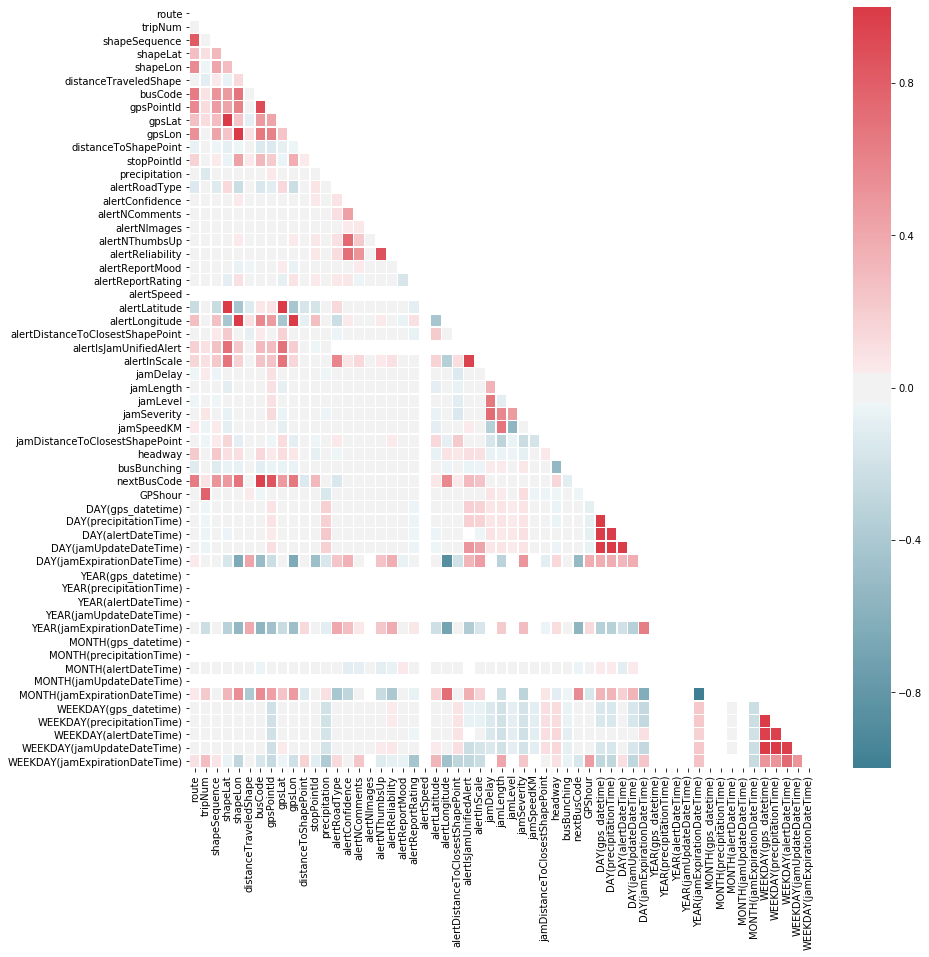

In [10]:
plot_corr(spearman_corr)

## Kendall

The Kendall correlation coefficient is a approach that measures the dependence (linear or non-linear) between two variables. The correlation coefficient ranges from -1 to 1.
* 1: total positive correlation
* -1: total negative correlation
* 0: no correlation

In [11]:
kendall_corr = df.corr(method="kendall")
kendall_corr

,route,tripNum,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,gpsLat,gpsLon,...,MONTH(gps_datetime),MONTH(precipitationTime),MONTH(alertDateTime),MONTH(jamUpdateDateTime),MONTH(jamExpirationDateTime),WEEKDAY(gps_datetime),WEEKDAY(precipitationTime),WEEKDAY(alertDateTime),WEEKDAY(jamUpdateDateTime),WEEKDAY(jamExpirationDateTime)
route,1.000000,0.007196,0.784209,0.168897,0.414489,0.015232,0.478285,0.413099,0.172693,0.384068,...,NaN,NaN,-0.030258,NaN,0.039175,-0.010376,-0.010376,0.020797,0.009647,0.087931
tripNum,0.007196,1.000000,0.012735,0.076205,-0.030722,-0.073774,0.054808,0.085312,0.087839,-0.008998,...,NaN,NaN,0.001990,NaN,0.182839,0.008984,0.008984,0.029085,0.027769,0.231364
shapeSequence,0.784209,0.012735,1.000000,0.200899,0.315917,0.039110,0.397017,0.338706,0.194838,0.311676,...,NaN,NaN,-0.028640,NaN,0.008634,0.001711,0.001711,0.022048,0.011416,0.070569
shapeLat,0.168897,0.076205,0.200899,1.000000,0.147931,-0.040553,0.326698,0.283422,0.995552,0.114988,...,NaN,NaN,0.008960,NaN,0.255807,0.000860,0.000860,0.007960,0.027498,-0.063261
shapeLon,0.414489,-0.030722,0.315917,0.147931,1.000000,0.087092,0.489941,0.423486,0.115192,0.995438,...,NaN,NaN,-0.029780,NaN,0.447398,-0.020342,-0.020342,0.014945,-0.001134,-0.117473
distanceTraveledShape,0.015232,-0.073774,0.039110,-0.040553,0.087092,1.000000,-0.006036,-0.021768,-0.058050,0.067580,...,NaN,NaN,-0.014663,NaN,-0.323984,0.003031,0.003031,0.001370,-0.003099,0.035300
busCode,0.478285,0.054808,0.397017,0.326698,0.489941,-0.006036,1.000000,0.766917,0.329502,0.471225,...,NaN,NaN,-0.043519,NaN,0.463379,-0.007803,-0.007803,0.025475,0.019046,-0.114962
gpsPointId,0.413099,0.085312,0.338706,0.283422,0.423486,-0.021768,0.766917,1.000000,0.283425,0.423173,...,NaN,NaN,-0.024241,NaN,0.366961,-0.146033,-0.146033,-0.140016,-0.150734,-0.190627
gpsLat,0.172693,0.087839,0.194838,0.995552,0.115192,-0.058050,0.329502,0.283425,1.000000,0.114636,...,NaN,NaN,0.002784,NaN,0.197927,0.012542,0.012542,0.018970,0.033820,-0.059677
gpsLon,0.384068,-0.008998,0.311676,0.114988,0.995438,0.067580,0.471225,0.423173,0.114636,1.000000,...,NaN,NaN,-0.026897,NaN,0.392183,-0.017436,-0.017436,0.007994,-0.003115,-0.064955


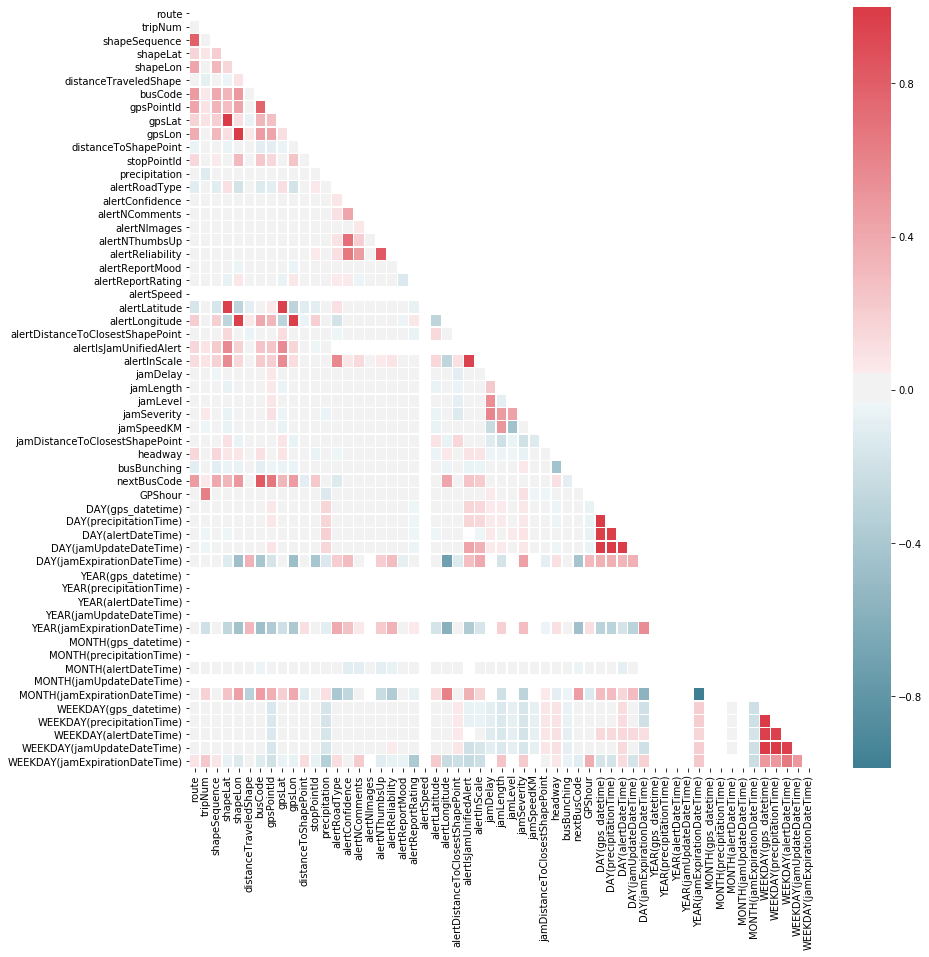

In [12]:
plot_corr(kendall_corr)

### Brief Discussion about Pearson, Spearman and Kendall coeficients

* They don't consider categorical variables: alertType, alertSubType, jamBlockType, shapeID, routeFrequency, problem.

* NaN: For constant variables, it's impossible to measure correlation because there is no variation.

### Calculating p-value for the selected variables (bigger correlation)

Are there statistical evidences for this association?

https://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance

multiple variables or per pair?

se p-value < 0.05 há evidências